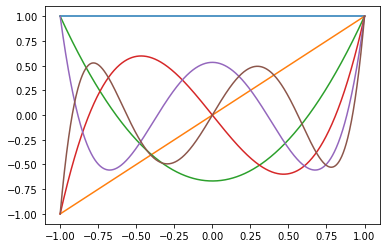

In [1]:
import numpy as np
import pylab as pl

def legendre(x,i):
    if i==0:
        return x*0. + 1.
    if(i==1):
        return x
    
    return 1/(i+1) * ((2*i+1)*x*legendre(x, i-1) - i*legendre(x, i-2))

x = np.linspace(-1,1,1000)
res = np.array([legendre(x, i) for i in range(0,6)])
pl.plot(x, res.T)

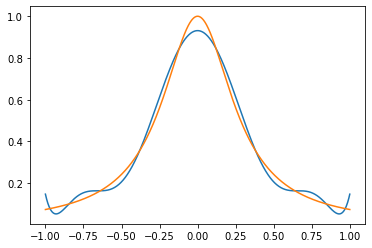

In [4]:
from scipy.integrate import quad
from scipy import linalg

def f(x):
    return 1/(1+50*(.5*x)**2)

n = 10

M = np.array([[quad(lambda x: legendre(x, i)*legendre(x, j), -1, 1)[0] for i in range(n)] for j in range(n)])

u = np.array([quad(lambda x: legendre(x, i)*f(x), -1, 1)[0] for i in range(n)])

p = linalg.solve(M, u)

x = np.linspace(-1,1, 1000)
poly = np.sum(np.array([p[i]*legendre(x,i) for i in range(n)]), 0)
pl.plot(x, poly)
pl.plot(x, f(x))